In [7]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

# MATPLOTLIB CONFIG

def conf_axis(ax, xmax=10, ymax=10, xmin=-10, ymin=-10):
    for ind, subplot in np.ndenumerate(ax):
        # Set axis ranges; by default this will put major ticks every 25.
        subplot.set_xlim(xmin, xmax)
        subplot.set_ylim(ymin, ymax)
        
        # Change major ticks to show every 1.
        subplot.xaxis.set_major_locator(MultipleLocator(int((xmax-xmin)/10+1)))
        subplot.yaxis.set_major_locator(MultipleLocator(int((ymax-ymin)/10+1)))

        # Change minor ticks to show every .5. (1/4 = .25)
        subplot.xaxis.set_minor_locator(AutoMinorLocator(2))
        subplot.yaxis.set_minor_locator(AutoMinorLocator(2))

        # Turn grid on for both major and minor ticks and style minor slightly differently.
        subplot.grid(which='major', color='#CCCCCC')
        subplot.grid(which='minor', color='#CCCCCC', linestyle='--')


# Splines

## Intro: Polynomials

They are _polynomials_:

$$
\sum_{i=0}^n a_i x^n = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n.
$$

The **degree** (or **order**) of a polynomial is the highest power of the variables. Polynomials of different degrees are given names: linear, quadratic, cubic, quartic... The higher the degree, the more changes of direction the polynomial can have.

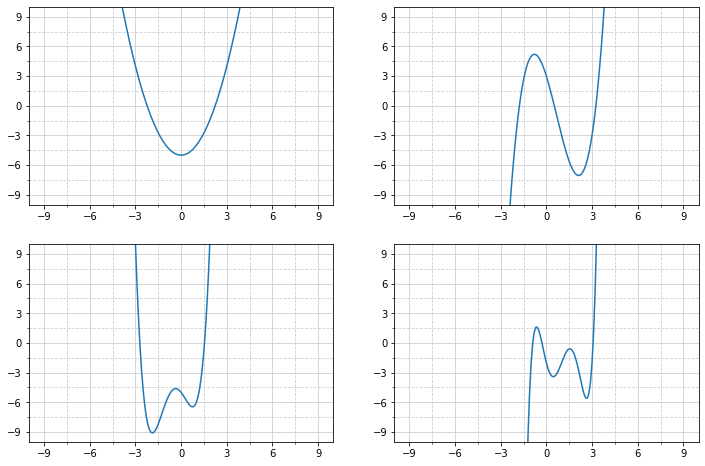

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
conf_axis(ax)

x = np.arange(-10, 10, 0.1) # OR np.linespace(start,end,number_of_samples)
ax[0, 0].plot(x, x**2 - 5)
ax[0, 1].plot(x, x**3 - 2*x**2 - 5*x + 3)
ax[1, 0].plot(x, x**4 + 2*x**3 - 2*x**2 - 2*x - 5)
ax[1, 1].plot(x, x**5 - 5*x**4 + 5*x**3 + 5*x**2 - 6*x - 2)
plt.show()

_(Explanations from Lecture notes of: Dr. Jon Siach, Manchester Metropolitan University, March 2015; and Prof. Wojciech Matusik, MIT CSAIL, 6.837 Computer Graphics)_
## Parametric equations

A parameter, $t$ is used to determine the value of the variables, e.g. the parametric equation of a straight line is

$$
x(t) = (1-t) x_0 + t x_1 \\
y(t) = (1-t) y_0 + t y_1
$$

where $0 \leq t \leq 1$. Let $P_0 = (x_0, y_0)$, $P_1 = (x_1, y_1)$ and $P = (x,y)$ then $P(t) = (1-t) P_0 + t P_1$.

## Bézier curves

A Bézier curve is a parametric funciton that is used to draw smooth lines. They are named after Pierre Bézier who used them for designing cars at Renault but they were actually invented by Paul de Casteljau 3 years earlier whilst working for Citroën. Common applications for them include CAD software, 3D modelling and smooth trajectory generation.

An $n$ degree Bézier curve is defined using $n+1$ **control points**. Translations, rotations and scaling can be easily applied to the control points.

### De Casteljau's algorithm

Let's assume we have a qubic curve (n=2), this curve requires three control points named $P_{0,1,2}$. Let's define the points $Q_{0,1}$ that lie on the lines $P_{0-1}$ and $P_{1-2}$:

$$
Q_0(t) = (1-t) P_0 + t P_1 \\
Q_1(t) = (1-t) P_1 + t P_2
$$

The points of the Bézier curve lie on the line $Q_{0-1}$:

$$
C(t) = (1-t) Q_0 + t Q_1
$$

Combining all the equations gives a quadratic polynomial function. This derivation can be generalized in the Casteljau's algorithm. Let $P_{i,j}$ denote the control points where $P_{i,0}$ are the original control points $P_0$ to $P_2$, $P_{i,1} are the points $Q_0$ to $Q_1$ and $P_{0,2}$ is C(t) or the points on the curve. Then

$$
P_{i,j}(t) = (1-t) P_{i,j-1} + t P_{i+1, j-1}.
$$

where each $j$ can be understood as the _"level"_ of the curve and $i$ can be understood as the index of the control point in each level. 

### Bernsteing form

The general form of a $n$ order Bézier curve defined by the contol points $P_i$ is

$$
C(t) = \sum_{i=0}^n b_{i,n}(t) P_i,
$$

where $b_{i,n}(t)$ are called **Bernstein polynomials** that are defined using 


$$
b_{i,n}(t) = \begin{pmatrix} n \\ i \end{pmatrix} t^i (1-t)^{n-i},
$$

and $\begin{pmatrix} n \\ i \end{pmatrix}$ is the Binomial coefficient. The **Binomial coefficient** (read as "$n$ choose $i$) gives the number of ways of choosing $i$ items from a set of $n$ items.

$$
\begin{pmatrix} n \\ i \end{pmatrix} = \frac{n!}{i!(n-i)!}
$$

### Matrix form

Another way of representing Bézier curves from the Bernstein formulation is in matrix form. Expanding the Bernstein polynomials we can rearrange them in the following matrices

$$
C(t) = \begin{bmatrix} P_0 && P_1 && \dots & P_{n-1} & P_n \end{bmatrix} M \begin{bmatrix} 1 \\ t \\ \vdots \\ t^{n-1} \\ t^n \end{bmatrix}
$$

where $M$ is a squared $(n+1) \times (n+1)$ matrix. The coefficients of the matrix $M$ are the transformation of monomials to the Bernstein polynomials (see below) and can be [obtained](https://github.com/supiket/bernstein/blob/master/bernstein_matrix.py) as

$$
M_{i,j} = -1^{j-i} \begin{pmatrix} n - i \\ j - i \end{pmatrix} \begin{pmatrix} n \\ i \end{pmatrix}
$$

for the upper right triangular values (Chang, 1981). The rest are 0.

### Splines as Vector Space

Splines can be study as a vector space. As we can see above, we can express the spline as a basis transformation between the canonical monomial basis of the polynomials' vector space and the Berstein Coefficients. Then, the transformation is applied to the control points in order to obtain the points of the curve (aka the curve is a linear combination of the control points with weights equal to Berstein polynomials at $t$). This can be generalized to a **General Spline Formulation** as

$$
C(t) = \textbf{GBT}(t) = \text{Geometry } \textbf{G} \cdot \text{ Spline Basis } \textbf{B} \cdot \text{ Power Basis } \textbf{T}(t)
$$

- Geometry: control points coordinates assembled into a matrix.
- Spline matrix/basis: defines the type of spline.
- Power basis: the monomials.

### Bézier surfaces

The extension to Bézier surfaces only requires to use two parameters $(u,v) \in [0,1]$ and control points in 3D. The degree and coefficients of the curve can be different in each direction. A Bézier of degree $(m,n)$ uses a $m$ degree curve in the $x$ direction and a $n$ degree curve in the $y$ direction. The Bernstein form is (defined for $x$, $y$ and $z$)

$$
C(t) = \sum_{j=0}^n \left[ \sum_{i=0}^m b_{i,m}(u) P_{i,j} \right] b_{j,n}(v)
$$

And the matrix form by expanding the Bernstein polynomials is

$$

C(t) = \begin{bmatrix} 1 & u & \dots & u^{n-1} & u^n \end{bmatrix} M \begin{bmatrix} P_{0,0} & P_{0,1} & \dots & P_{0, m-1} & P_{0,m} \\ P_{1,0} & P_{1,1} & \dots & P_{1, m-1} & P_{1,m} \\ \vdots && \dots && \vdots \\ P_{n-1,0} & P_{n-1,1} & \dots & P_{n-1, m-1} & P_{n-1,m} \\ P_{n,0} & P_{n,1} & \dots & P_{n, m-1} & P_{n,m} \\ \end{bmatrix} N \begin{bmatrix} 1 \\ v \\ \vdots \\ v^{n-1} \\ v^n \end{bmatrix}

$$

## Bézier curve class and parametric plot

The class uses a pre-computation of the Bernstein coefficients matrix in order to sample the curve with a simple matrix computation.

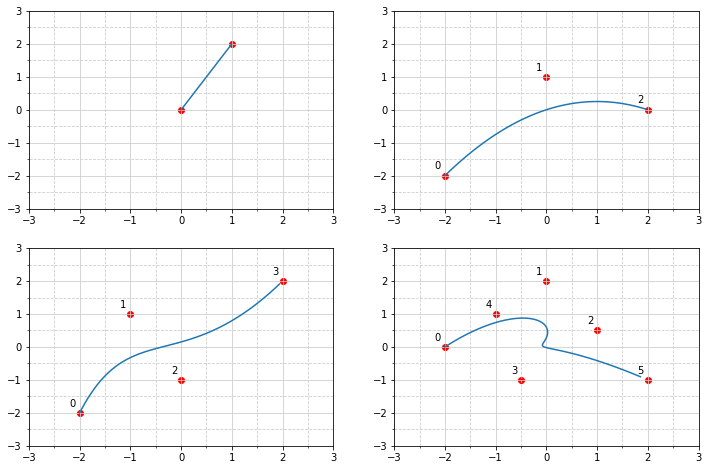

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
conf_axis(ax,3,3,-3,-3)

t = np.arange(0, 1, 0.01)

# Straight line parametric equations
x_0 = 0
x_1 = 1
y_0 = 0
y_1 = 2
x_t = (1-t) * x_0 + t * x_1
y_t = (1-t) * y_0 + t * y_1
ax[0,0].plot(x_t, y_t)
ax[0,0].scatter([x_0, x_1], [y_0, y_1], color='r')

import math

class BezierCurve:
    def __init__(self, n, P):
        if(n+1 != P.shape[1]):
            P = np.zeros((2,n+1))
            print("ERROR: Number of control points is wrong for degree of curve!")
        self.n = n
        self.n_ext = n+1
        self.P = P # A numpy.array of size: dim X n+1
        self.precomputeBernsCoeff()

    def precomputeBernsCoeff(self):
        self.M = np.zeros((self.n_ext,self.n_ext))
        for j in range(0, self.n_ext):
            for i in range(0, j+1):
                self.M[i,j] = self.mop(j - i) * self.binomial(self.n - i, j - i) * self.binomial(self.n ,i)
        self.PM = self.P @ self.M

    def evaluate(self, t):
        T = np.zeros((self.n_ext, t.shape[0]))
        for i in range(0, self.n_ext):
            T[i] = t**i
        return self.PM @ T


    def plotBernstein(self, ax):
        x = np.linspace(0,1, 100)
        for i in range(self.n):
            ax.plot(x, self.bernsteinPolynomial(i, self.n-1, x))

    def bernsteinPolynomial(self, i, n, t):
        return self.binomial(n,i) * t**i * (1 - t)**(n-i)

    def binomial(self,n,r):
        return math.factorial(n) // math.factorial(r) // math.factorial(n-r)

    def mop(self, i):
        if((i%2)==0):
            return 1
        else:
            return -1

p = np.array([[-2, 0, 2], [-2, 1, 0]])
curv = BezierCurve(2, p)
c_t = curv.evaluate(t)
ax[0,1].plot(c_t[0,:], c_t[1,:])
ax[0,1].scatter(p[0,:], p[1,:],color='r')
for i in range(p.shape[1]):
    ax[0,1].annotate(i, (p[0,i]-0.2, p[1,i]+0.2))


p = np.array([[-2, -1, 0, 2], [-2, 1, -1, 2]])
curv = BezierCurve(3, p)
c_t = curv.evaluate(t)
ax[1,0].plot(c_t[0,:], c_t[1,:])
ax[1,0].scatter(p[0,:], p[1,:],color='r')
for i in range(p.shape[1]):
    ax[1,0].annotate(i, (p[0,i]-0.2, p[1,i]+0.2))

p = np.array([[-2, 0, 1, -0.5, -1, 2], [0, 2, 0.5, -1, 1, -1]])
curv = BezierCurve(5, p)
c_t = curv.evaluate(t)
ax[1,1].plot(c_t[0,:], c_t[1,:])
ax[1,1].scatter(p[0,:], p[1,:],color='r')
for i in range(p.shape[1]):
    ax[1,1].annotate(i, (p[0,i]-0.2, p[1,i]+0.2))
plt.show()

### Bernstein polynomials plot

This shows the effect (weight) of each control point. It can also be seen as the linear combination of the polynomial basis applied on the control points to form the curve. As can be noticed, the polynomials sum up to one. That is the reason why splines can be enclosed in a convex hull formed by the control points.

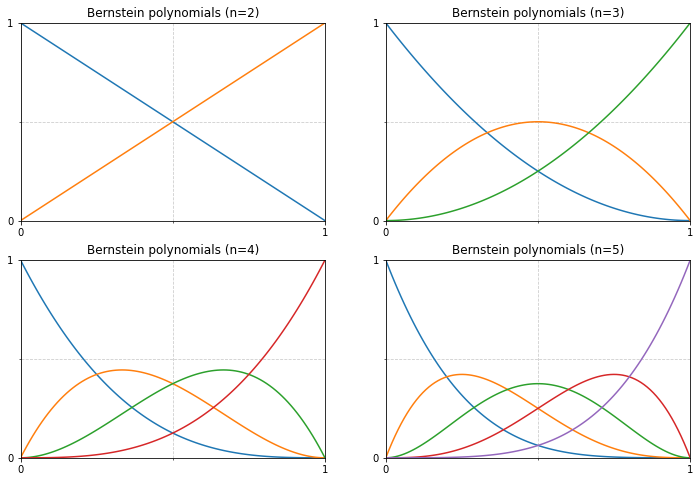

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
conf_axis(ax,1,1,0,0)

ax[0,0].title.set_text("Bernstein polynomials (n=2)")
p = np.array([[-2, 0, 2], [-2, 1, 0]])
curv = BezierCurve(2, p)
curv.plotBernstein(ax[0,0])

ax[0,1].title.set_text("Bernstein polynomials (n=3)")
p = np.array([[-2, -1, 0, 2], [-2, 1, -1, 2]])
curv = BezierCurve(3, p)
curv.plotBernstein(ax[0,1])

ax[1,0].title.set_text("Bernstein polynomials (n=4)")
p = np.array([[-2, 0, 1, -0.5, -1], [0, 2, 0.5, -1, 1]])
curv = BezierCurve(4, p)
curv.plotBernstein(ax[1,0])

ax[1,1].title.set_text("Bernstein polynomials (n=5)")
p = np.array([[-2, 0, 1, -0.5, -1, 2], [0, 2, 0.5, -1, 1, -1]])
curv = BezierCurve(5, p)
curv.plotBernstein(ax[1,1])

plt.show()

## B-splines

BIG TODO: UNIFORM INDICES (I,J,K,N)!!

A problem with Bézier curve (being a polynomial) is that they can have as many changes of direction as the degree minus one. In case that we want to represent a curve with a lot of changes, the degree of the Bézier curve must be really high. B-splines use several Bézier curves joined end on end. That way, the degree of the polynomials can remain low even if we use a lot of control points. A $k$ degree B-spline curve defined by $n+1$ control points consists of $n-k+1$ Bézier curves. Thus, a B-spline is a picewise polynomial function. The assumption of B-splines is continuity up to the second derivative for the end and start points of each Bézier curve. The equation for a B-spline curve of degree $k$ and $n$ control points is

$$
S(t) = \sum_{i=0}^n N_{i,k}(t) P_i,
$$

where $P_i$ are control points and $N_{i,k}(t)$ are the **basis functions** which are defined using the **Cox-de Boor recursion formula**

$$
N_{i,0}(t) = \begin{cases} 1 & \text{if } t_i \leq t < t_{i+1} \\ 0 & \text{otherwise} \end{cases}, \\
N_{i,j}(t) = \frac{t-t_i}{t_{i+j} - t_i} N_{i, j-1}(t) + \frac{t_{i+j+1} - t}{t_{i+j+1}-t_{i+1}} N_{i+1, j-1}(t).
$$

The values of $t_i$ are taken from a sequence called a **knot vector**

$$
\textbf{T} = (t_0, t_1, \dots , t_m),
$$

where the values of $t$ are in the range $t \in [t_0, t_m]$. The knots that $t$ lies between determine the bases function that affects the shape of the B-spline. 
The knots can be understood as the _"time"_ that takes to traverse a certain Bézier curve piece. The **support** of a basis function is the largest interval where the function is positive (noted: $\text{supp}N_{i,k} = [t_n, t_m]$). The knots of a B-spline curve are the endpoints of the supports of the basis functions that define the curve. The endpoints of the support of the basis functions of order $K$ are two knots in the knot vector that are $K$ knots apart. In order to ensure that the B-spline starts and finishes at the start and ending point of the curve, they endpoints are repeated $K+1$ times. The number of knots in $\textbf(T)$, $m+1$ is related to the degree $k$ and the number of the control points $n+1$ by

$$
m = k+n+1
$$

NOTICE that $m$ is the number of the subscript of the last knot and the number of knots is $m+1$!!!

The B-spline curve is contained in the convex hull of its control points. Every point on the curve is a **barycentric combination** of the vertices of the control points. 


### Uniform B-splines

A B-spline is uniform if the, except for the repeated knots, every two consecutive knots in the knot vector are equidistant. In that case, the knot vector can be chosen as:

$$
\textbf{T} = (0, 0, \dots, 1, 2, \dots , M-3, M-2, \dots, M-2),
$$

with the dots representing $K+1$ repetitions of the knots. Then, the curve will be defined

$$
S(t) = \sum_{i=0}^n N_{i,k}(t) P_i, \quad t \in [0, M-2].
$$

### Basis functions

The basis functions of a Uniform B-spline can be constructed from its knot vector. Every B-spline basis function is a nonnegative piecewise polynomial function. The basis function of order 0 are piecewise constant function since they indicate which B-spline is active at each $t$. Each basis function of order $n$ is obtained recursively from two basis functions of order $n-1$ as explained above. In the Cox-de Boor formula, the knots in the denominator of the coefficient of a basis function are the endpoints of that basis function's support. The new basis function's support is the union of the supports of the two from which it is built. If the denominator is zero, then the basis function is also zero so the summand is omitted (as the interval for the basis function of order 0 is empty, check above).

### Matrix form Cox de-Boor

_From Kaihuai Q. (1982)_

By means of basis translation from B-spline to power basis, $B_{j,k-1}$ can be represented as follows:

$$
B_{j,k-1} = \begin{bmatrix} 1 & t & t^2 & \dots t^{k-2} \end{bmatrix} \begin{bmatrix} N_{0,j}^{k-1} \\ N_{1,j}^{k-1} \\ \vdots \\ N^{k-1}_{k-2,j} \end{bmatrix}
$$

a polynomial product that can be rewritten by Toeplitz matrix (see useful literature for explanation):

$$
B_{j,k-1} = \begin{bmatrix} 1 & u & u^2 & \dots u^{k-2} \end{bmatrix} \begin{bmatrix} N_{0,j}^{k-1} & 0 \\ N_{1,j}^{k-1} &  N_{0,j}^{k-1} \\ \vdots &   N_{1,j}^{k-1} \\ N_{k-2,j}^{k-1} \vdots \\ 0 &  N_{k-2,j}^{k-1} \end{bmatrix} \begin{bmatrix} d_{0,j} \\ d_{1,j} \end{bmatrix} +  \begin{bmatrix} N_{0,j+1}^{k-1} & 0 \\ N_{1,j+1}^{k-1} &  N_{0,j+1}^{k-1} \\ \vdots &   N_{1,j+1}^{k-1} \\ N_{k-2,j+1}^{k-1} \vdots \\ 0 &  N_{k-2,j+1}^{k-1} \end{bmatrix} \begin{bmatrix} h_{0,j} \\ h_{1,j} \end{bmatrix}
$$

where

$$
d_{0,j} = \frac{t_i-t_j}{t_{j+k-1} - t_j}, \quad d_{1,j} = \frac{t_{i+1}-t_i}{t_{j+k-1} - t_j} \\
h_{0,j} = \frac{t_{j+k}-t_i}{t_{j+k} - t_{j+1}}, \quad h_{1,j} = -\frac{t_{i+1}-t_i}{t_{j+k} - t_{j+1}}
$$

with the convention $0/0=0$.

As B-spline basis functions are piecewise polynomials of degree $k-1$. If $t \in [t_i, t_{i+1})$ there are $k$ B-spline basis functions of degree $k-1$ that are non-zero. They can be represented in a matrix equation as follows 

## Useful literature

- Chang, G. and Junheng Wu. “Mathematical foundations of Bézier's technique.” _Computer-aided Design_ 13 (1981): 133-136.

- E. Cohen & R. F. Riesenfeld. General matrix representations for Bezier and B-spline curves. _Computers in Industry_, 3:9-15, 1982

- Kaihuai Qin, "General matrix representations for B-splines," _Proceedings Pacific Graphics '98. Sixth Pacific Conference on Computer Graphics and Applications_ (Cat. No.98EX208), 1998, pp. 37-43, doi: 10.1109/PCCGA.1998.731996.

- Polynomials convolutions through Toeplitz Matrix, ([link](https://www.gaussianwaves.com/2014/02/polynomials-convolution-and-toeplitz-matrices-connecting-the-dots/)): useful for the development of Kaihuai's paper.

### Down the rabbit hole

The work of Kaihuai Q. derives a general matrix formulation for B-splines and particularizes for the case of Uniform B-splines and Bézier curves. The derivation is based on representing the basis functions as Toeplitz matrix that were traditionally used to represent products of polynomials. At the same time, these are equivalent to convolutions. Thus, we can see a B-spline curve as the convolution of the basis function of different orders and derive the matrix form by means of the iterative convolution between the different basis functions. The De Casteljau's algorithm can give an intuitive idea of how the different Bernstein's polynomials (or basis functions) are related by their convolution in the construction of the splines.